In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

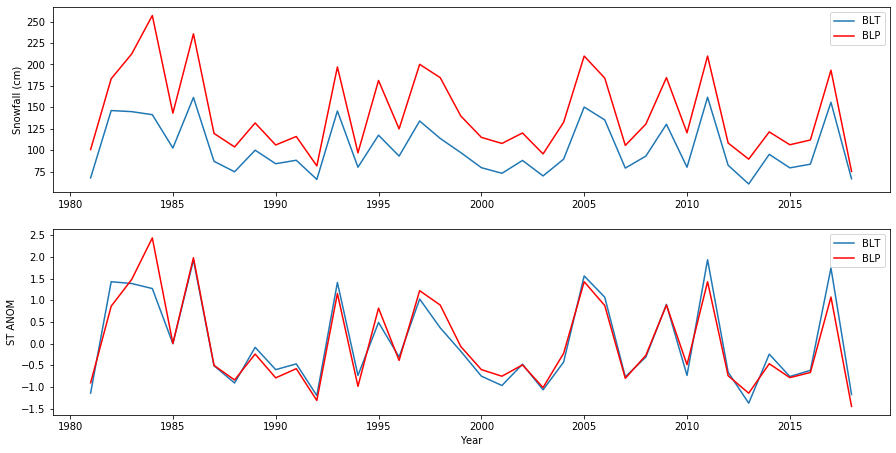

In [25]:
#Figure 4.1
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2018.csv", names = ['Year','TGL','BLP','BLT','FRM','PAR','TIM','PAY'])
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','TIM','PAY'] else x)
#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['Year'],snow['BLT'],label='BLT')
ax1.plot(snow['Year'],snow['BLP'],color='red',label='BLP')
ax1.set_ylabel('Snowfall (cm)')
ax1.legend()

#get means
blt_mean = np.mean(snow['BLT'])
blp_mean = np.mean(snow['BLP'])

#get st devs
blt_std = np.std(snow['BLT'])
blp_std = np.std(snow['BLP'])

#get anomalies
blt_anom = snow['BLT'] - blt_mean
blp_anom = snow['BLP'] - blp_mean

#standardize anomalies
blt_st_anom = blt_anom/blt_std
blp_st_anom = blp_anom/blp_std

#plot anomalies
ax2.plot(snow['Year'],blt_st_anom,label='BLT')
ax2.plot(snow['Year'],blp_st_anom,label='BLP',color='red')
ax2.legend()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')

plt.show()

In [32]:
snow.loc[snow['Year'].idxmax(),'BLP']

75.438